<a href="https://colab.research.google.com/github/hamegg320/MMEs/blob/main/Precipitation_RCM_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###事前準備

In [1]:
# Google Driveに接続させる
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 作業ディレクトリを移動する　→　そのディレクトリでデータを保存できる
%cd /content/drive/MyDrive/sges/seminar2023/precipitation_rcm/

/content/drive/.shortcut-targets-by-id/1lZ3a_o_u8wxF9HYsqzbp7NN4azcsL97U/sges/seminar2023/precipitation_rcm


In [3]:
# 作業領域を確認する
%ls

pr_EAS-22_MOHC-HadGEM2-ES_historical_r1i1p1_GERICS-REMO2015_v1_day_19700101-19701230.nc
pr_EAS-22_MOHC-HadGEM2-ES_historical_r1i1p1_GERICS-REMO2015_v1_day_19710101-19751230.nc
pr_EAS-22_MOHC-HadGEM2-ES_historical_r1i1p1_GERICS-REMO2015_v1_day_19760101-19801230.nc
pr_EAS-22_MOHC-HadGEM2-ES_historical_r1i1p1_GERICS-REMO2015_v1_day_19810101-19851230.nc
pr_EAS-22_MOHC-HadGEM2-ES_historical_r1i1p1_GERICS-REMO2015_v1_day_19860101-19901230.nc
pr_EAS-22_MOHC-HadGEM2-ES_historical_r1i1p1_GERICS-REMO2015_v1_day_19910101-19951230.nc
pr_EAS-22_MOHC-HadGEM2-ES_historical_r1i1p1_GERICS-REMO2015_v1_day_19960101-20001230.nc
pr_EAS-22_MOHC-HadGEM2-ES_historical_r1i1p1_GERICS-REMO2015_v1_day_20010101-20051230.nc


In [4]:
pip install netCDF4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 52.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 88.7 MB/s eta 0:00:00


In [18]:
### Import modules
import os
import csv
import math
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
from statistics import stdev

In [6]:
# ディレクトリパス
current_directory = "/content/drive/MyDrive/sges/seminar2023/precipitation_rcm/"

####1つのモデルでhistoricalから極端降水量を求める

In [7]:
# データを読み込む
file = current_directory + "pr_EAS-22_MOHC-HadGEM2-ES_historical_r1i1p1_GERICS-REMO2015_v1_day_19700101-19701230.nc"
ds = Dataset(file, mode='r',format="NETCDF4")

In [ ]:
print(ds)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    institution: Helmholtz-Zentrum Geesthacht, Climate Service Center Germany
    institute_id: GERICS
    experiment_id: historical
    source: GERICS-REMO2015
    model_id: GERICS-REMO2015
    forcing: N/A
    parent_experiment_id: N/A
    parent_experiment_rip: N/A
    branch_time: 0.0
    contact: gerics-cordex@hzg.de
    history: There is no special history for this experiment. 2019-03-22T15:41:14Z CMOR rewrote data to comply with CF standards and CORDEX requirements.
    comment: CORDEX-CORE East Asia RCM REMO EAS-22. Data_policy: This data has been produced in the context of the WCRP Initiative on CORDEX-CORE (http://www.cordex.org/experiment-guidelines/cordex-core). While abiding by the highest scientific and technical standards, GERICS cannot warrant that any information provided will be entirely free from errors or omissions or that such errors or omissions can or will be rectified e

In [ ]:
#変数について
for var in ds.variables.values():
  print(var)

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    bounds: time_bnds
    units: days since 1949-12-01T00:00:00Z
    calendar: 360_day
    axis: T
    long_name: time
    standard_name: time
unlimited dimensions: time
current shape = (360,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 time_bnds(time, bnds)
unlimited dimensions: time
current shape = (360, 2)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 rlat(rlat)
    units: degrees
    axis: Y
    long_name: latitude in rotated pole grid
    standard_name: grid_latitude
unlimited dimensions: 
current shape = (255,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 rlon(rlon)
    units: degrees
    axis: X
    long_name: longitude in rotated pole grid
    standard_name: grid_longitude
unlimited dimensions: 
current shape = (417,)
filling on, default _FillValu

In [ ]:
time=ds["time"][:]
for i in range(360):
 print(time[i])

7230.5
7231.5
7232.5
7233.5
7234.5
7235.5
7236.5
7237.5
7238.5
7239.5
7240.5
7241.5
7242.5
7243.5
7244.5
7245.5
7246.5
7247.5
7248.5
7249.5
7250.5
7251.5
7252.5
7253.5
7254.5
7255.5
7256.5
7257.5
7258.5
7259.5
7260.5
7261.5
7262.5
7263.5
7264.5
7265.5
7266.5
7267.5
7268.5
7269.5
7270.5
7271.5
7272.5
7273.5
7274.5
7275.5
7276.5
7277.5
7278.5
7279.5
7280.5
7281.5
7282.5
7283.5
7284.5
7285.5
7286.5
7287.5
7288.5
7289.5
7290.5
7291.5
7292.5
7293.5
7294.5
7295.5
7296.5
7297.5
7298.5
7299.5
7300.5
7301.5
7302.5
7303.5
7304.5
7305.5
7306.5
7307.5
7308.5
7309.5
7310.5
7311.5
7312.5
7313.5
7314.5
7315.5
7316.5
7317.5
7318.5
7319.5
7320.5
7321.5
7322.5
7323.5
7324.5
7325.5
7326.5
7327.5
7328.5
7329.5
7330.5
7331.5
7332.5
7333.5
7334.5
7335.5
7336.5
7337.5
7338.5
7339.5
7340.5
7341.5
7342.5
7343.5
7344.5
7345.5
7346.5
7347.5
7348.5
7349.5
7350.5
7351.5
7352.5
7353.5
7354.5
7355.5
7356.5
7357.5
7358.5
7359.5
7360.5
7361.5
7362.5
7363.5
7364.5
7365.5
7366.5
7367.5
7368.5
7369.5
7370.5
7371.5
7372.5

In [9]:
rlat=ds["rlat"][:]
for i in range(255):
 print(rlat[i])

-22.54
-22.32
-22.1
-21.88
-21.66
-21.44
-21.220000000000002
-21.0
-20.78
-20.560000000000002
-20.34
-20.12
-19.900000000000002
-19.68
-19.46
-19.240000000000002
-19.02
-18.8
-18.580000000000002
-18.36
-18.14
-17.92
-17.7
-17.48
-17.26
-17.04
-16.82
-16.6
-16.38
-16.16
-15.940000000000001
-15.72
-15.5
-15.280000000000001
-15.06
-14.84
-14.620000000000001
-14.4
-14.180000000000001
-13.96
-13.74
-13.520000000000001
-13.3
-13.08
-12.860000000000001
-12.64
-12.42
-12.200000000000001
-11.98
-11.76
-11.540000000000001
-11.32
-11.100000000000001
-10.88
-10.66
-10.440000000000001
-10.22
-10.0
-9.780000000000001
-9.56
-9.34
-9.120000000000001
-8.9
-8.680000000000001
-8.46
-8.24
-8.020000000000001
-7.800000000000001
-7.580000000000001
-7.36
-7.140000000000001
-6.920000000000001
-6.700000000000001
-6.48
-6.260000000000001
-6.040000000000001
-5.82
-5.6000000000000005
-5.380000000000001
-5.160000000000001
-4.94
-4.720000000000001
-4.500000000000001
-4.28
-4.0600000000000005
-3.8400000000000007
-3.6

In [10]:
rlon=ds["rlon"][:]
for i in range(417):
 print(rlon[i])

-45.650000000000006
-45.43000000000001
-45.21
-44.99
-44.77
-44.550000000000004
-44.330000000000005
-44.11000000000001
-43.89
-43.67
-43.45
-43.230000000000004
-43.010000000000005
-42.790000000000006
-42.57
-42.35
-42.13
-41.910000000000004
-41.690000000000005
-41.470000000000006
-41.25000000000001
-41.03
-40.81
-40.59
-40.370000000000005
-40.150000000000006
-39.93000000000001
-39.71
-39.49
-39.27
-39.050000000000004
-38.830000000000005
-38.61000000000001
-38.39
-38.17
-37.95
-37.730000000000004
-37.510000000000005
-37.290000000000006
-37.07
-36.85
-36.63
-36.410000000000004
-36.190000000000005
-35.970000000000006
-35.75000000000001
-35.53
-35.31
-35.09
-34.870000000000005
-34.650000000000006
-34.43000000000001
-34.21
-33.99
-33.77
-33.550000000000004
-33.330000000000005
-33.11000000000001
-32.89
-32.67
-32.45
-32.230000000000004
-32.010000000000005
-31.790000000000003
-31.570000000000004
-31.350000000000005
-31.130000000000003
-30.910000000000004
-30.690000000000005
-30.47000000000000

In [ ]:
for i in range(417):
  print(ds["lat"][0][i])

-1.2751318
-1.2048041
-1.1347437
-1.0649515
-0.9954285
-0.92617553
-0.85719347
-0.78848326
-0.7200458
-0.651882
-0.5839927
-0.5163789
-0.44904134
-0.38198105
-0.31519887
-0.24869567
-0.18247236
-0.11652983
-0.050868943
0.014509412
0.07960436
0.14441502
0.20894052
0.27318
0.33713257
0.40079737
0.46417353
0.5272602
0.5900565
0.65256155
0.71477455
0.7766946
0.83832085
0.8996525
0.96068865
1.0214285
1.081871
1.1420157
1.2018614
1.2614075
1.320653
1.3795972
1.4382392
1.4965781
1.5546132
1.6123438
1.6697688
1.7268875
1.7836992
1.8402028
1.8963978
1.9522833
2.0078583
2.0631223
2.1180744
2.1727138
2.2270398
2.2810514
2.3347478
2.3881285
2.4411926
2.4939392
2.5463676
2.5984771
2.6502671
2.7017365
2.7528846
2.8037107
2.8542142
2.9043941
2.9542499
3.0037806
3.0529857
3.1018643
3.1504157
3.1986394
3.2465343
3.2941
3.3413355
3.3882403
3.4348137
3.481055
3.5269635
3.5725381
3.6177788
3.6626842
3.7072542
3.7514877
3.7953844
3.8389435
3.882164
3.9250457
3.9675877
4.0097895
4.05165
4.093169
4.134346
4.

####適当に緯度経度を日本あたりに設定してみる。

In [ ]:
###東京の場合　北緯36度、東経140度
#point_lat_st=35.7 #陸地の範囲
#point_lat_gl=37.8
point_lat=10.0
#point_lon_st=138.8
#point_lon_gl=140.68
point_lon=22.93
sum_pr=[]

#point_lon=point_lon+180
new_lat=0
new_lon=0
count_lat=0
count_lon=0

for y in range(len(rlat)):
  if  rlat[y] >= (point_lat-0.22) and rlat[y] <= (point_lat+0.22):
    count_lat+=1
    #print(lat[y])
    if count_lat > 1:
      if (point_lat - rlat[y])**2 > (point_lat - rlat[new_lat])**2 :
        new_lat=new_lat
      else:
        new_lat=y
    else:
      new_lat=y

  #  print(count_lat)
   # print(lat[new_lat],"!") #北緯35.492958

for x in range(len(rlon)):
  if  rlon[x] >= (point_lon-0.22) and rlon[x] <= (point_lon+0.22):    #print(lat[y])
      count_lon+=1
      if count_lon >1:
        if (point_lon - rlon[x])**2 > (point_lon - rlon[new_lon])**2 :
          new_lon=new_lon
        else:
          new_lon=x
      else:
        new_lon=x
print(rlat[new_lat])
print(rlon[new_lon])

10.02
22.989999999999995


filenames, ['pr_EAS-22_MOHC-HadGEM2-ES_historical_r1i1p1_GERICS-REMO2015_v1_day_19700101-19701230.nc', 'pr_EAS-22_MOHC-HadGEM2-ES_historical_r1i1p1_GERICS-REMO2015_v1_day_19710101-19751230.nc', 'pr_EAS-22_MOHC-HadGEM2-ES_historical_r1i1p1_GERICS-REMO2015_v1_day_19760101-19801230.nc', 'pr_EAS-22_MOHC-HadGEM2-ES_historical_r1i1p1_GERICS-REMO2015_v1_day_19810101-19851230.nc', 'pr_EAS-22_MOHC-HadGEM2-ES_historical_r1i1p1_GERICS-REMO2015_v1_day_19860101-19901230.nc', 'pr_EAS-22_MOHC-HadGEM2-ES_historical_r1i1p1_GERICS-REMO2015_v1_day_19910101-19951230.nc', 'pr_EAS-22_MOHC-HadGEM2-ES_historical_r1i1p1_GERICS-REMO2015_v1_day_19960101-20001230.nc', 'pr_EAS-22_MOHC-HadGEM2-ES_historical_r1i1p1_GERICS-REMO2015_v1_day_20010101-20051230.nc']
MOHC-HadGEM2-ES	MOHC-HadGEM2-ES	MOHC-HadGEM2-ES	MOHC-HadGEM2-ES	MOHC-HadGEM2-ES	MOHC-HadGEM2-ES	MOHC-HadGEM2-ES	MOHC-HadGEM2-ES	
model_dict, {'MOHC-HadGEM2-ES': ['pr_EAS-22_MOHC-HadGEM2-ES_historical_r1i1p1_GERICS-REMO2015_v1_day_19700101-19701230.nc', 'pr_EAS

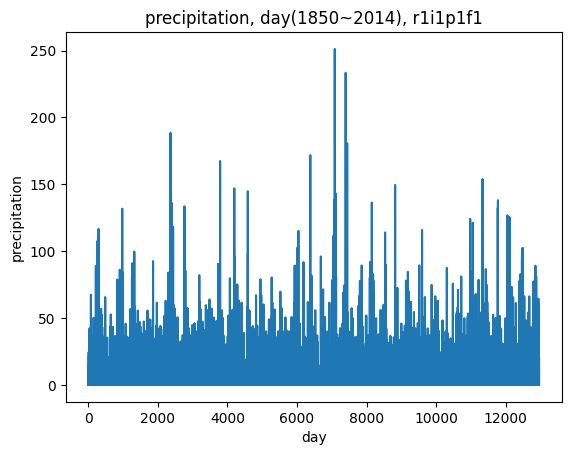

In [ ]:
### Import modules
import os
import csv
import math
from netCDF4 import Dataset
import matplotlib.pyplot as plt

### Store file names by model names into directory
model_dict = {}
filenames = sorted(os.listdir()) #場所をcdでseaice_modelにしているからその中のデータを並び替えている。年代順・アンサンブル順にも
print("filenames,", filenames)

##########################アンサンブルを揃えたマルチモデルの場合の変更点###############################
for filename in filenames:
  ensemble="r1i1p1f1" #指定するアンサンブル

  if filename.split('_')[4] in ensemble:
    model_name = filename.split('_')[2] #並び替えた文字列をsplitで_の2個目で分割　例)siextentn_SImon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc

    print(model_name, end = '\t')

    if model_name not in model_dict:    #並び替えた文字列がディクショナリにない場合
      model_dict[model_name] = [filename] #分割されたモデルもいれることができる。keyに対してvalueは複数可能
    else:
      model_dict[model_name].append(filename) #ディクショナリのキーに2個目で分割した文字列を入れる。

print("")
print("model_dict,",model_dict)

############################################################################

### Plot average of sea ice extent every model
# store sea ice extent throughout all the years by models
for model_name, files in model_dict.items(): #ディレクトリ内をループのため、itms method
  sum_pr = []

  for file in files: #ディクショナリのvalueの部分がfileになっているため
    #print(file) データは分かれている。

    ds = Dataset(file, mode='r',format="NETCDF4")
    run_time = len(ds['time']) #timeのもの
    lat = ds['lat'][:]
    lon=  ds['lon'][:]

##################追加コード########################
    ###東京の場合　北緯36度、東経140度
    #point_lat_st=35.7 #陸地の範囲
    #point_lat_gl=37.8
    point_lat=10.0
    #point_lon_st=138.8
    #point_lon_gl=140.68
    point_lon=22.93

    #point_lon=point_lon+180
    new_lat=0
    new_lon=0
    count_lat=0
    count_lon=0

    for y in range(len(rlat)):
      if  rlat[y] >= (point_lat-0.22) and rlat[y] <= (point_lat+0.22):
        count_lat+=1
        #print(lat[y])
        if count_lat > 1:
          if (point_lat - rlat[y])**2 > (point_lat - rlat[new_lat])**2 :
            new_lat=new_lat
          else:
            new_lat=y
        else:
          new_lat=y

      #  print(count_lat)
      # print(lat[new_lat],"!") #北緯35.492958

    for x in range(len(rlon)):
      if  rlon[x] >= (point_lon-0.22) and rlon[x] <= (point_lon+0.22):    #print(lat[y])
          count_lon+=1
          if count_lon >1:
            if (point_lon - rlon[x])**2 > (point_lon - rlon[new_lon])**2 :
              new_lon=new_lon
            else:
              new_lon=x
          else:
            new_lon=x

    for i in range(run_time):
      if len(ds['pr'].dimensions) > 1: #dsのdimensionが1つ以上
        sum_pr.append(ds["pr"][i][new_lat][new_lon]*60*60*24)
      else:
        sum_pr.append(ds['pr'][i])
##################################################

  #lists & variables
  day_map = []

  for i in range(len(sum_pr)):
    day_map.append(i+1)

  #plt.figure(figsize=(6, 6)
  plt.plot(day_map ,sum_pr)
#plt.ylim(9.0,15.5)
#plt.xlim(-1,165)
print(len(sum_pr))
plt.ylabel('precipitation')
plt.title(f'precipitation, day(1850~2014), {ensemble}')
plt.xlabel('day')
plt.show()

####極端降水量の値を出す。

目標：1970年から2005年の季節別の極端降水量をcsv形式に保存する。そうすれば、来週将来予測にそのファイルを使用して比較できる。

In [8]:
# データを読み込む
file = current_directory + "pr_EAS-22_MOHC-HadGEM2-ES_historical_r1i1p1_GERICS-REMO2015_v1_day_19700101-19701230.nc"
ds = Dataset(file, mode='r',format="NETCDF4")
file_1 = current_directory + "pr_EAS-22_MOHC-HadGEM2-ES_historical_r1i1p1_GERICS-REMO2015_v1_day_19710101-19751230.nc"
ds_1 = Dataset(file_1, mode='r',format="NETCDF4")
file_2 = current_directory + "pr_EAS-22_MOHC-HadGEM2-ES_historical_r1i1p1_GERICS-REMO2015_v1_day_19760101-19801230.nc"
ds_2 = Dataset(file_2, mode='r',format="NETCDF4")
file_3 = current_directory + "pr_EAS-22_MOHC-HadGEM2-ES_historical_r1i1p1_GERICS-REMO2015_v1_day_19810101-19851230.nc"
ds_3 = Dataset(file_3, mode='r',format="NETCDF4")
file_4 = current_directory + "pr_EAS-22_MOHC-HadGEM2-ES_historical_r1i1p1_GERICS-REMO2015_v1_day_19860101-19901230.nc"
ds_4 = Dataset(file_4, mode='r',format="NETCDF4")
file_5 = current_directory + "pr_EAS-22_MOHC-HadGEM2-ES_historical_r1i1p1_GERICS-REMO2015_v1_day_19910101-19951230.nc"
ds_5 = Dataset(file_5, mode='r',format="NETCDF4")
file_6 = current_directory + "pr_EAS-22_MOHC-HadGEM2-ES_historical_r1i1p1_GERICS-REMO2015_v1_day_19960101-20001230.nc"
ds_6 = Dataset(file_6, mode='r',format="NETCDF4")
file_7 = current_directory + "pr_EAS-22_MOHC-HadGEM2-ES_historical_r1i1p1_GERICS-REMO2015_v1_day_20010101-20051230.nc"
ds_7 = Dataset(file_7, mode='r',format="NETCDF4")

In [11]:
###東京の場合　北緯36度、東経140度
#point_lat_st=35.7 #陸地の範囲
#point_lat_gl=37.8
point_lat=10.0
#point_lon_st=138.8
#point_lon_gl=140.68
point_lon=22.93
sum_pr=[]

#point_lon=point_lon+180
new_lat=0
new_lon=0
count_lat=0
count_lon=0

for y in range(len(rlat)):
  if  rlat[y] >= (point_lat-0.22) and rlat[y] <= (point_lat+0.22):
    count_lat+=1
    #print(lat[y])
    if count_lat > 1:
      if (point_lat - rlat[y])**2 > (point_lat - rlat[new_lat])**2 :
        new_lat=new_lat
      else:
        new_lat=y
    else:
      new_lat=y

  #  print(count_lat)
   # print(lat[new_lat],"!") #北緯35.492958

for x in range(len(rlon)):
  if  rlon[x] >= (point_lon-0.22) and rlon[x] <= (point_lon+0.22):    #print(lat[y])
      count_lon+=1
      if count_lon >1:
        if (point_lon - rlon[x])**2 > (point_lon - rlon[new_lon])**2 :
          new_lon=new_lon
        else:
          new_lon=x
      else:
        new_lon=x

for i in range(len(ds['time']) ):
  sum_pr.append(ds["pr"][i][new_lat][new_lon]*60*60*24)
for i in range(len(ds_1['time']) ):
  sum_pr.append(ds_1["pr"][i][new_lat][new_lon]*60*60*24)
for i in range(len(ds_2['time']) ):
  sum_pr.append(ds_2["pr"][i][new_lat][new_lon]*60*60*24)
for i in range(len(ds_3['time']) ):
  sum_pr.append(ds_3["pr"][i][new_lat][new_lon]*60*60*24)
for i in range(len(ds_4['time']) ):
  sum_pr.append(ds_4["pr"][i][new_lat][new_lon]*60*60*24)
for i in range(len(ds_5['time']) ):
  sum_pr.append(ds_5["pr"][i][new_lat][new_lon]*60*60*24)
for i in range(len(ds_6['time']) ):
  sum_pr.append(ds_6["pr"][i][new_lat][new_lon]*60*60*24)
for i in range(len(ds_7['time']) ):
  sum_pr.append(ds_7["pr"][i][new_lat][new_lon]*60*60*24)


#lists & variables
#季節
MAM=[] #3,4,5
JJA=[] #6,7,8
SON=[] #9,10,11
DJF=[] #12,1,2

count=0
for i in range(len(sum_pr)):

  if count <= 60 :#1月 2月
    DJF.append(sum_pr[i])
  elif count >60 and count <= 150: #3,4,5
    MAM.append(sum_pr[i])
  elif count >150 and count <= 240: #6,7,8
    JJA.append(sum_pr[i])
  elif count >240 and count <= 330: #9,10,11
    SON.append(sum_pr[i])
  elif count >330 and count <= 360: #12
    DJF.append(sum_pr[i])
    if count==360:
      count=0
    else:
      pass
  count += 1

###極端降水量を求める
extra_MAM=np.percentile(MAM,99)
extra_JJA=np.percentile(JJA,99)
extra_SON=np.percentile(SON,99)
extra_DJF=np.percentile(DJF,99)
print(extra_MAM, "3~5月の極端降水量")
print(extra_JJA, "6~8月の極端降水量")
print(extra_SON, "9~11月の極端降水量")
print(extra_DJF, "12~2月の極端降水量")

MAM_count=0
JJA_count=0
SON_count=0
DJF_count=0
for i in range(len(MAM)):
  if MAM[i] >= extra_MAM:
    MAM_count+=1

for i in range(len(JJA)):
  if JJA[i] >= extra_JJA:
    JJA_count+=1

for i in range(len(SON)):
  if SON[i] >= extra_SON:
    SON_count+=1

for i in range(len(DJF)):
  if DJF[i] >= extra_DJF:
    DJF_count+=1

print(MAM_count,"3~5月の極端降水量の値")
print(JJA_count,"6~8月の極端降水量の値")
print(SON_count,"9~11月の極端降水量の値")
print(DJF_count,"12~2月の極端降水量の値")

#for i in range(len(jan_pr_map)):
 # day_map.append(i+1)
#plt.figure(figsize=(6, 6)
#plt.plot(day_map, jan_pr_map)
#plt.ylim(0,15)
#plt.xlim(-1,165)
#plt.ylabel('precipitation flux(kg/m**2/day)')
#plt.title('tokyo_jan_precipitation_max, r1i1p1f1')
#plt.xlabel('year')
#plt.show()

51.13326786272229 3~5月の極端降水量
80.91150636412206 6~8月の極端降水量
82.45209673047066 9~11月の極端降水量
46.058865442872076 12~2月の極端降水量
33 3~5月の極端降水量の値
33 6~8月の極端降水量の値
33 9~11月の極端降水量の値
33 12~2月の極端降水量の値


In [13]:
# 作業ディレクトリを移動する　→　そのディレクトリでデータを保存できる
%cd /content/drive/MyDrive/nozue_version

/content/drive/MyDrive/nozue_version


In [14]:
f = open('extra_precipitation.csv', 'w')
data = [extra_MAM, extra_JJA, extra_SON, extra_DJF]
writer = csv.writer(f)
writer.writerow(data)
f.close()

極端降水量の季節別の値を求めることができ、csv形式で保存することができた。

###それぞれのヒストグラムを描いてみる

51.13326786272229 3~5月の極端降水量
80.91150636412206 6~8月の極端降水量
82.45209673047066 9~11月の極端降水量
46.058865442872076 12~2月の極端降水量


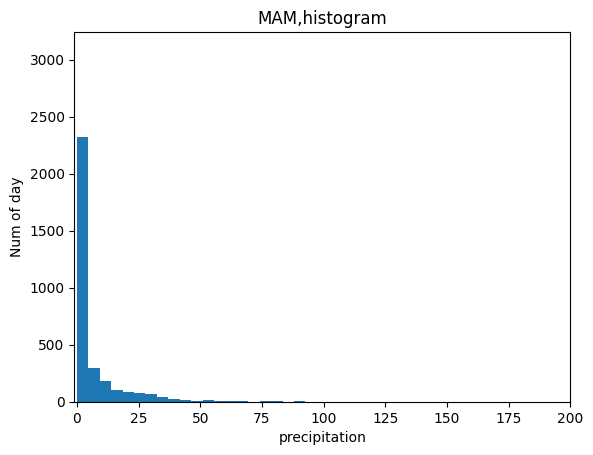

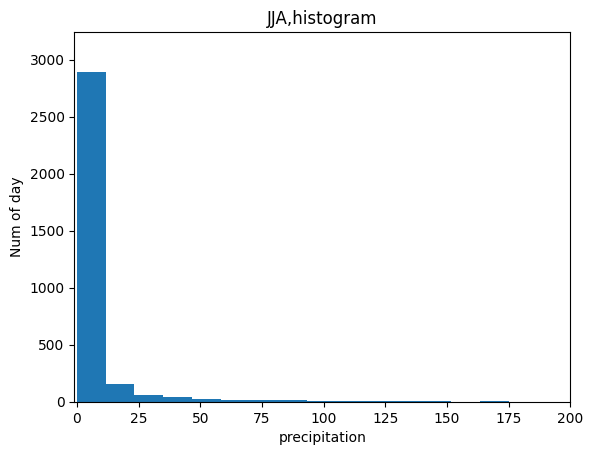

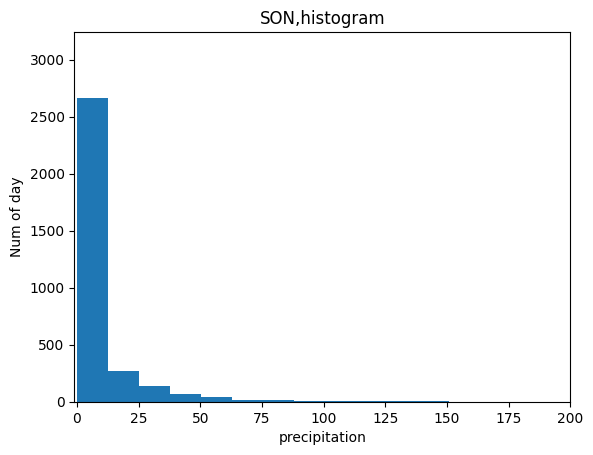

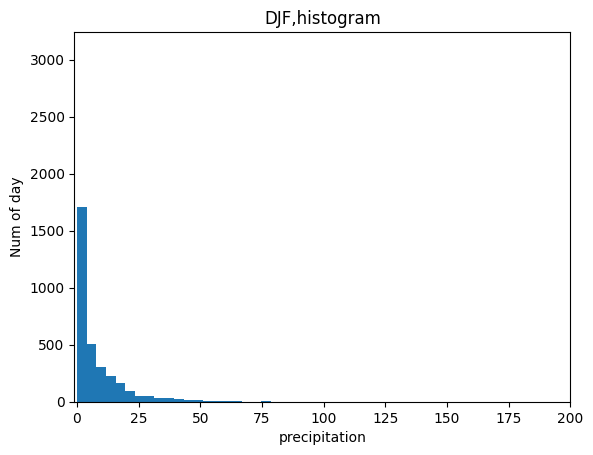

In [37]:
###東京の場合　北緯36度、東経140度
#point_lat_st=35.7 #陸地の範囲
#point_lat_gl=37.8
point_lat=10.0
#point_lon_st=138.8
#point_lon_gl=140.68
point_lon=22.93
sum_pr=[]

#point_lon=point_lon+180
new_lat=0
new_lon=0
count_lat=0
count_lon=0

for y in range(len(rlat)):
  if  rlat[y] >= (point_lat-0.22) and rlat[y] <= (point_lat+0.22):
    count_lat+=1
    #print(lat[y])
    if count_lat > 1:
      if (point_lat - rlat[y])**2 > (point_lat - rlat[new_lat])**2 :
        new_lat=new_lat
      else:
        new_lat=y
    else:
      new_lat=y

  #  print(count_lat)
   # print(lat[new_lat],"!") #北緯35.492958

for x in range(len(rlon)):
  if  rlon[x] >= (point_lon-0.22) and rlon[x] <= (point_lon+0.22):    #print(lat[y])
      count_lon+=1
      if count_lon >1:
        if (point_lon - rlon[x])**2 > (point_lon - rlon[new_lon])**2 :
          new_lon=new_lon
        else:
          new_lon=x
      else:
        new_lon=x

for i in range(len(ds['time']) ):
  sum_pr.append(ds["pr"][i][new_lat][new_lon]*60*60*24)
for i in range(len(ds_1['time']) ):
  sum_pr.append(ds_1["pr"][i][new_lat][new_lon]*60*60*24)
for i in range(len(ds_2['time']) ):
  sum_pr.append(ds_2["pr"][i][new_lat][new_lon]*60*60*24)
for i in range(len(ds_3['time']) ):
  sum_pr.append(ds_3["pr"][i][new_lat][new_lon]*60*60*24)
for i in range(len(ds_4['time']) ):
  sum_pr.append(ds_4["pr"][i][new_lat][new_lon]*60*60*24)
for i in range(len(ds_5['time']) ):
  sum_pr.append(ds_5["pr"][i][new_lat][new_lon]*60*60*24)
for i in range(len(ds_6['time']) ):
  sum_pr.append(ds_6["pr"][i][new_lat][new_lon]*60*60*24)
for i in range(len(ds_7['time']) ):
  sum_pr.append(ds_7["pr"][i][new_lat][new_lon]*60*60*24)


#lists & variables
#季節
MAM=[] #3,4,5
JJA=[] #6,7,8
SON=[] #9,10,11
DJF=[] #12,1,2

count=0
for i in range(len(sum_pr)):

  if count <= 60 :#1月 2月
    DJF.append(sum_pr[i])
  elif count >60 and count <= 150: #3,4,5
    MAM.append(sum_pr[i])
  elif count >150 and count <= 240: #6,7,8
    JJA.append(sum_pr[i])
  elif count >240 and count <= 330: #9,10,11
    SON.append(sum_pr[i])
  elif count >330 and count <= 360: #12
    DJF.append(sum_pr[i])
    if count==360:
      count=0
    else:
      pass
  count += 1

###それぞれの極端降水量を求める
extra_MAM=np.percentile(MAM,99)
extra_JJA=np.percentile(JJA,99)
extra_SON=np.percentile(SON,99)
extra_DJF=np.percentile(DJF,99)
print(extra_MAM, "3~5月の極端降水量")
print(extra_JJA, "6~8月の極端降水量")
print(extra_SON, "9~11月の極端降水量")
print(extra_DJF, "12~2月の極端降水量")

##################ヒストグラムに#######
fig = plt.figure()
plt.hist(MAM, bins=20)
plt.ylim(0,3240)
plt.xlim(-1,200)
plt.title('MAM,histogram')
plt.xlabel('precipitation')
plt.ylabel('Num of day')
fig.show()

fig = plt.figure()
plt.hist(JJA, bins=20)
plt.ylim(0,3240)
plt.xlim(-1,200)
plt.title('JJA,histogram')
plt.xlabel('precipitation')
plt.ylabel('Num of day')
fig.show()

fig = plt.figure()
plt.hist(SON, bins=20)
plt.ylim(0,3240)
plt.xlim(-1,200)
plt.title('SON,histogram')
plt.xlabel('precipitation')
plt.ylabel('Num of day')
fig.show()

fig = plt.figure()
plt.hist(DJF, bins=20)
plt.ylim(0,3240)
plt.xlim(-1,200)
plt.title('DJF,histogram')
plt.xlabel('precipitation')
plt.ylabel('Num of day')
fig.show()

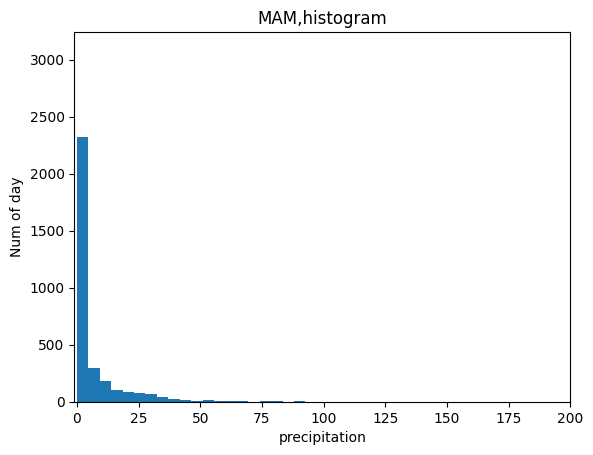

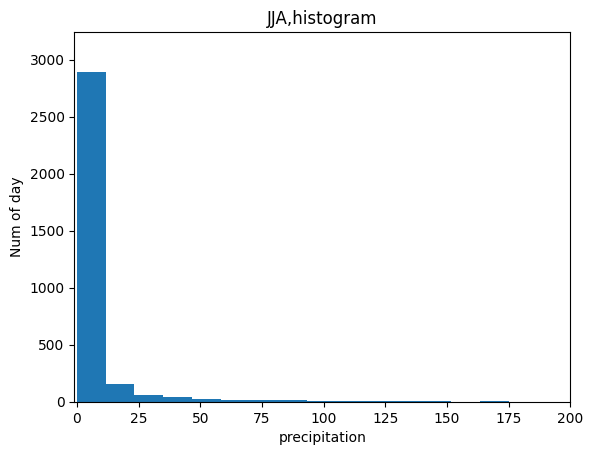

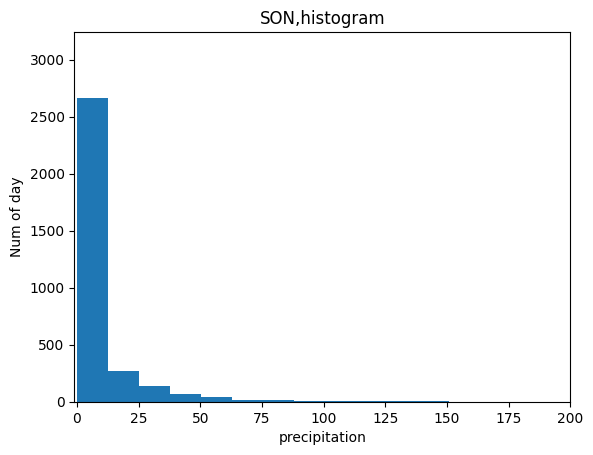

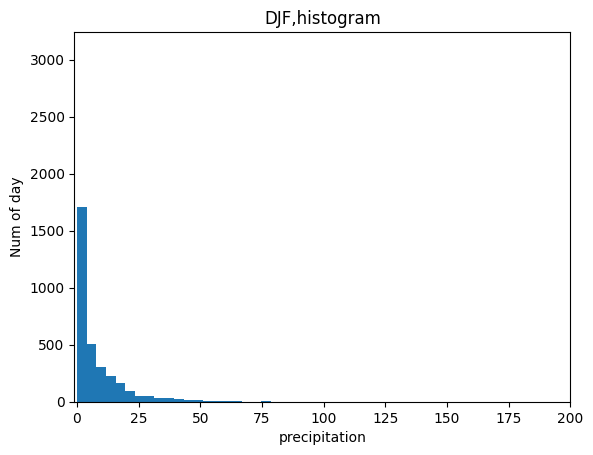

In [36]:
fig = plt.figure()
plt.hist(MAM, bins=20)
plt.ylim(0,3240)
plt.xlim(-1,200)
plt.title('MAM,histogram')
plt.xlabel('precipitation')
plt.ylabel('Num of day')
fig.show()

fig = plt.figure()
plt.hist(JJA, bins=20)
plt.ylim(0,3240)
plt.xlim(-1,200)
plt.title('JJA,histogram')
plt.xlabel('precipitation')
plt.ylabel('Num of day')
fig.show()

fig = plt.figure()
plt.hist(SON, bins=20)
plt.ylim(0,3240)
plt.xlim(-1,200)
plt.title('SON,histogram')
plt.xlabel('precipitation')
plt.ylabel('Num of day')
fig.show()

fig = plt.figure()
plt.hist(DJF, bins=20)
plt.ylim(0,3240)
plt.xlim(-1,200)
plt.title('DJF,histogram')
plt.xlabel('precipitation')
plt.ylabel('Num of day')
fig.show()